---------------------- sample -------------------------- 

the real sample mean is [-0.01839284  0.00473471 -0.00415429  0.00869373 -0.01405803  0.00255018
 -0.00403875  0.00085068  0.00051988 -0.00781807] 

------------------ original duchi ---------------------- 

mean using Duchi's method: [-0.39917689 -0.0806418  -0.16128359  0.12096269 -0.29837464 -0.06451344
  0.10080224 -0.20563658 -0.0806418  -0.14515523] 

------------------ modified duchi ---------------------- 

mean using modified Duchi's method: [-0.2741821   0.21370076  0.13305896  0.10483433 -0.01209627 -0.02419254
  0.20160449 -0.14112314  0.14112314  0.0806418 ] 

------------------ proposed method --------------------- 

mean using proposed method: [ 0.06540309 -0.1010775  -0.1843178  -0.19026353  0.05945735 -0.07729456
 -0.08918603  0.05351162 -0.06540309  0.04162015] 



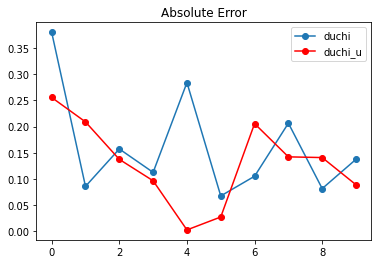

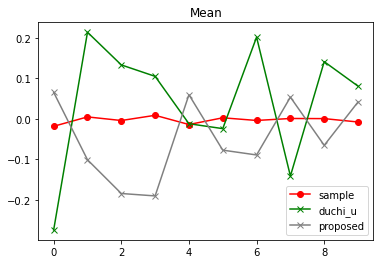

<Figure size 432x288 with 0 Axes>

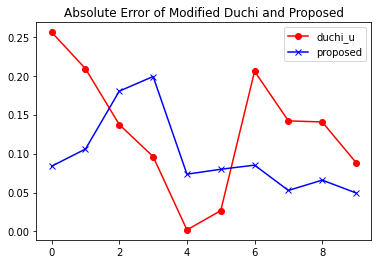

<Figure size 432x288 with 0 Axes>

In [2]:
# test the duchi method
from duchi import *
from proposed import *

# set the attribute dimension
dimension = 10
# set the number of users or data
num = 5000
# set the privacy budget
epsilon = 0.7
random.seed(10)

print('---------------------- sample --------------------------', '\n')
sample_t = np.array([[random.uniform(-1, 1)
                      for di in range(dimension)] for n in range(num)])
sample_mean = np.mean(sample_t, axis=0)
print('the real sample mean is', sample_mean, '\n')

print('------------------ original duchi ----------------------', '\n')
duchi_method_t = np.array([duchi_method(tp, epsilon) for tp in sample_t])
duchi_method_mean = np.mean(duchi_method_t, axis=0)
print('mean using Duchi\'s method:', duchi_method_mean, '\n')
# print("absolute error of Duchi's method:",
#       np.fabs(sample_mean - duchi_method_mean), '\n')
# print("relative error of Duchi's method:", np.fabs(
#     np.true_divide(sample_mean - duchi_method_mean, sample_mean)), '\n')

# print('max expect', np.max(np.fabs(sample_mean-duchi_method_mean)))
# print('upper O', np.true_divide(
#     np.sqrt(dimension*np.log(dimension)), (epsilon*np.sqrt(num))))

print('------------------ modified duchi ----------------------', '\n')
duchi_method_u_t = np.array(
    [duchi_method_modified_u(tp, epsilon) for tp in sample_t])
duchi_method_u_mean = np.mean(duchi_method_u_t, axis=0)
print('mean using modified Duchi\'s method:', duchi_method_u_mean, '\n')

print('------------------ proposed method ---------------------', '\n')
proposed_method_t = np.array(
    [proposed_method(tp, epsilon) for tp in sample_t])
proposed_method_mean = np.mean(proposed_method_t, axis=0)
print('mean using proposed method:', proposed_method_mean, '\n')

# compare the absolute error of original duchi with modified duchi
plt.plot(np.fabs(sample_mean - duchi_method_mean),
         marker="o", label="duchi")
plt.plot(np.fabs(sample_mean - duchi_method_u_mean),
         marker="o", color="red", label="duchi_u")
plt.title("Absolute Error")
plt.legend()
plt.show()

# compare the mean of sample, modified duchi and proposed
plt.plot(sample_mean, marker="o", color="red", label="sample")
# plt.plot(duchi_method_mean, marker="x", color="blue", label="duchi")
plt.plot(duchi_method_u_mean, marker="x", color="green", label="duchi_u")
plt.plot(proposed_method_mean, marker="x", color="gray", label="proposed")
plt.legend()
plt.title("Mean")
plt.figure()
plt.show()

# compare the absolute error of modified duchi and proposed
plt.plot(np.fabs(sample_mean-duchi_method_u_mean),
         marker="o", color="red", label="duchi_u")
plt.plot(np.fabs(sample_mean-proposed_method_mean),
         marker="x", color="blue", label="proposed")
plt.legend()
plt.title("Absolute Error of Modified Duchi and Proposed")
plt.figure()
plt.show()


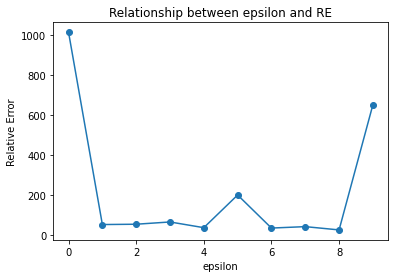

In [3]:
y = []
for i in range(1, 11):
    epsilon = i / 10
    sample_t = np.array([[random.uniform(-1, 1) for di in range(dimension)] for n in range(num)])
    sample_mean = np.mean(sample_t, axis=0)
    # print("the real sample mean is", sample_mean, "\n")

    proposed_method_t = np.array([proposed_method(tp, epsilon) for tp in sample_t])

    proposed_method_mean = np.mean(proposed_method_t, axis=0)
    y.append(np.mean(np.fabs(np.true_divide(sample_mean - proposed_method_mean, sample_mean))))

plt.plot(y, marker="o")
plt.title("Relationship between epsilon and RE")
plt.xlabel("epsilon")
plt.ylabel("Relative Error")
plt.show()